# By Mohamed Hamdy Abushama

### Description
>> Sports wear company product analytics for their campaign success 

### Importing Required Libraries

In [933]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss,confusion_matrix, f1_score,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import sklearn.feature_selection
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [477]:
# loading our dataset
df = pd.read_csv('full_gen_data.csv')

In [13]:
# Displaying all columns for better visual
pd.options.display.max_columns = None

In [14]:
df.head() # Displaying first 5 rows

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


### Wrangling

In [22]:
df.shape

(100000, 24)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   country         100000 non-null  object        
 1   article         100000 non-null  object        
 2   sales           100000 non-null  int64         
 3   regular_price   100000 non-null  float64       
 4   current_price   100000 non-null  float64       
 5   ratio           100000 non-null  float64       
 6   retailweek      100000 non-null  datetime64[ns]
 7   promo1          100000 non-null  int64         
 8   promo2          100000 non-null  int64         
 9   customer_id     100000 non-null  object        
 10  article.1       100000 non-null  object        
 11  productgroup    100000 non-null  object        
 12  category        100000 non-null  object        
 13  cost            100000 non-null  float64       
 14  style           100000 non-null  obje

In [17]:
df.describe(include='all')

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000,100000,100000,100000.000000,100000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
unique,3,477,NaN,NaN,NaN,NaN,123,NaN,NaN,NaN,10,4,6,NaN,3,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Germany,BR3179,NaN,NaN,NaN,NaN,2015-11-22,NaN,NaN,NaN,LI3529,SHOES,TRAINING,NaN,regular,"xxs,xs,s,m,l,xl,xxl",women,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,49400,610,NaN,NaN,NaN,NaN,1100,NaN,NaN,NaN,10000,60000,30000,NaN,50000,90000,70000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,56.781800,52.391200,28.290800,0.545646,NaN,0.061900,0.004900,2721.726500,NaN,NaN,NaN,6.517000,NaN,NaN,NaN,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,NaN,NaN,87.934743,35.272128,22.578343,0.194363,NaN,0.240975,0.069829,1908.085499,NaN,NaN,NaN,3.914728,NaN,NaN,NaN,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,NaN,NaN,1.000000,3.950000,1.950000,0.296482,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,1.290000,NaN,NaN,NaN,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,NaN,NaN,10.000000,25.950000,11.950000,0.354839,NaN,0.000000,0.000000,1017.000000,NaN,NaN,NaN,2.290000,NaN,NaN,NaN,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,NaN,NaN,26.000000,40.950000,20.950000,0.525044,NaN,0.000000,0.000000,2091.000000,NaN,NaN,NaN,6.950000,NaN,NaN,NaN,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,NaN,NaN,64.000000,79.950000,37.950000,0.699248,NaN,0.000000,0.000000,4570.250000,NaN,NaN,NaN,9.600000,NaN,NaN,NaN,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000


#### From first exploring the dataset includes 5 categorical variables, and the rest are numerical

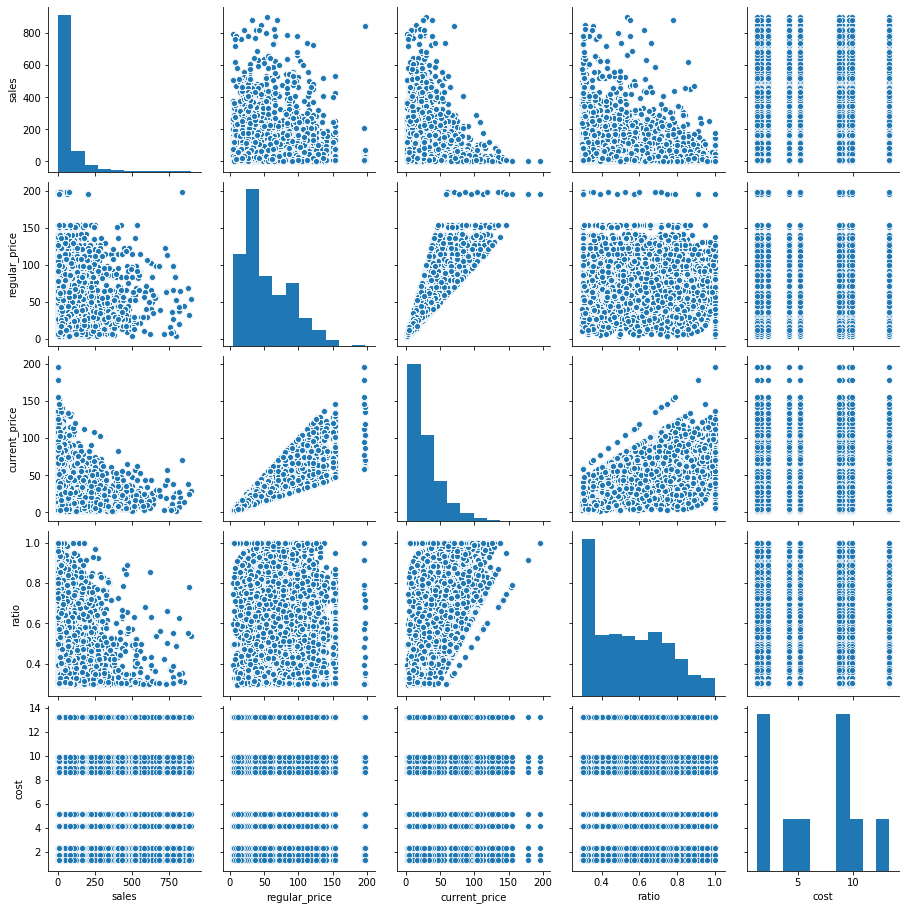

In [32]:
sns.pairplot(df[['sales','regular_price','current_price','ratio','cost']])
plt.show()

In [34]:
# Number of uniques in each variable
df.nunique()

country              3
article            477
sales              476
regular_price      123
current_price      141
ratio             2722
retailweek         123
promo1               2
promo2               2
customer_id       4549
article.1           10
productgroup         4
category             6
cost                10
style                3
sizes                2
gender               4
rgb_r_main_col       7
rgb_g_main_col      10
rgb_b_main_col      10
rgb_r_sec_col        3
rgb_g_sec_col        3
rgb_b_sec_col        3
label                2
dtype: int64

In [478]:
# Converting customer Id to object dtype
df['customer_id'] = df['customer_id'].astype(str)

In [38]:
df['customer_id'].dtype

dtype('O')

In [41]:
df['label'].value_counts(normalize=True)

0    0.86072
1    0.13928
Name: label, dtype: float64

### Obviuosly the binary target is imbalanced and needs some work

In [42]:
df.isnull().sum()

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
customer_id       0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

In [44]:
df['category'].value_counts()

TRAINING            30000
RUNNING             20000
FOOTBALL GENERIC    20000
INDOOR              10000
GOLF                10000
RELAX CASUAL        10000
Name: category, dtype: int64

In [47]:
df['productgroup'].value_counts()

SHOES                   60000
HARDWARE ACCESSORIES    20000
SWEATSHIRTS             10000
SHORTS                  10000
Name: productgroup, dtype: int64

In [64]:
df['country'].value_counts()

Germany    49400
Austria    35140
France     15460
Name: country, dtype: int64

In [65]:
df['sizes'].value_counts()

xxs,xs,s,m,l,xl,xxl    90000
xs,s,m,l,xl            10000
Name: sizes, dtype: int64

In [66]:
df['retailweek'].describe()

count         100000
unique           123
top       2015-11-22
freq            1100
Name: retailweek, dtype: object

In [479]:
df['retailweek'] = pd.to_datetime(df['retailweek'])

In [480]:
df['retailweek'].dtypeShe Deserves

dtype('<M8[ns]')

In [481]:
# Extracting the year from retail week variable
df['year'] = df['retailweek'].dt.year

In [482]:
df['year'].value_counts()

2015    42790
2016    41830
2017    14600
2014      780
Name: year, dtype: int64

In [627]:
df.groupby('label').mean()

,sales,regular_price,current_price,ratio,promo1,promo2,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,year,revenue
label,,,,,,,,,,,,,,,
0,60.908077,52.604417,26.625063,0.510688,0.055686,0.004334,6.513645,161.421252,139.793092,133.539630,207.742611,181.376057,209.882470,2015.698229,1396.552450
1,31.282309,51.073564,38.584693,0.761681,0.100302,0.008400,6.537730,161.268667,138.406735,133.255098,207.436674,181.547961,210.008329,2015.728891,1138.609886


In [531]:
 # creating new variable called revenue by using sales, price, and cost variables
df['revenue'] = (df['sales'] * df['current_price']) - df['cost']

In [83]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2016,97.31
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,2016,108.31
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2016,108.90
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2016,101.60
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2016,101.00


# EDA

In [178]:
def count_graphs (data,var):
    data[var].value_counts().plot(kind='bar',figsize=(8,4))
    plt.title(var.upper() + ' Frequency')

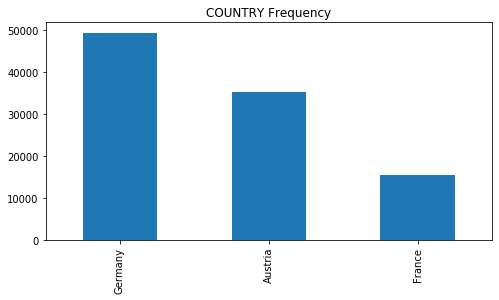

In [179]:
count_graphs(df,'country') 

#### Germany is the most dominant country in the dataset 

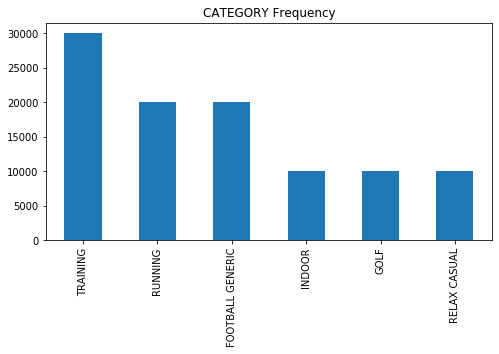

In [180]:
count_graphs(df,'category') 

#### We can see that training category is most dominant in the dataset followed by Running and Football Generic with same frequency

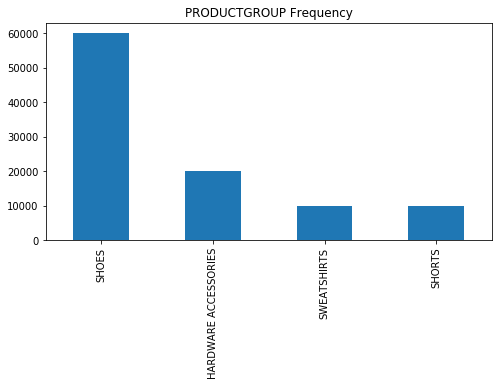

In [183]:
count_graphs(df,'productgroup') 

#### Shoes are the most dominant product in the dataset by 60000 record followed by hardware accessories by 20000

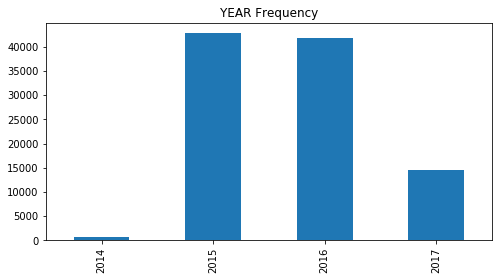

In [185]:
count_graphs(df,'year') 

In [214]:
df['year'].value_counts()

2015    42790
2016    41830
2017    14600
2014      780
Name: year, dtype: int64

##### The most frequent year is 2015 followed by 2016

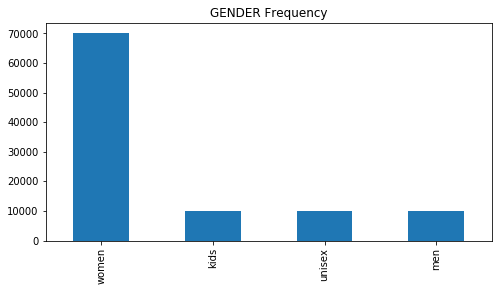

In [187]:
count_graphs(df,'gender') 

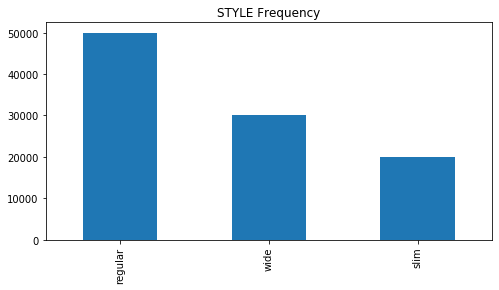

In [188]:
count_graphs(df,'style') 

In [190]:
df['style'].value_counts(normalize=True)

regular    0.5
wide       0.3
slim       0.2
Name: style, dtype: float64

In [189]:
df['gender'].value_counts(normalize=True)

women     0.7
kids      0.1
unisex    0.1
men       0.1
Name: gender, dtype: float64

##### women with 70% frequency in the dataset, and the 30% left between men, kids, and unisex, additional regular style is the most requested style in the dataset by 50%, and 30% of wide style 

In [191]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2016,97.31
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,2016,108.31
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2016,108.90
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2016,101.60
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2016,101.00


In [1258]:
df.groupby('country').mean()

,sales,regular_price,current_price,ratio,promo1,promo2,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
country,,,,,,,,,,,,,,,,
Austria,56.696073,52.079482,28.385401,0.550408,0.064599,0.000000,6.517,161.4,139.6,133.5,207.7,181.4,209.9,0.143540,2015.690666,1363.798737
France,57.358344,56.790880,30.528266,0.541370,0.058215,0.031695,6.517,161.4,139.6,133.5,207.7,181.4,209.9,0.132406,2015.722510,1416.387398
Germany,56.662348,51.236032,27.523279,0.543596,0.061134,0.000000,6.517,161.4,139.6,133.5,207.7,181.4,209.9,0.138401,2015.704656,1340.918709


In [1266]:
df_buy.groupby('country').mean()

,sales,regular_price,current_price,ratio,promo1,promo2,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
country,,,,,,,,,,,,,,,,
Austria,33.479778,50.719033,38.555274,0.765282,0.102895,0.000000,6.440712,160.689136,139.340008,135.304520,207.064631,181.528152,209.702220,1.0,2015.719469,1197.966584
France,29.840743,56.253859,42.082877,0.753653,0.100635,0.057157,6.612286,159.911578,137.503664,133.569614,207.259404,181.555936,209.897411,1.0,2015.751343,1118.563483
Germany,30.092731,49.784138,37.559039,0.761427,0.098289,0.000000,6.586984,162.102530,137.988591,131.648969,207.764224,181.560187,210.267369,1.0,2015.729121,1100.821353


In [1267]:
df_buy.groupby('year').mean()

,sales,regular_price,current_price,ratio,promo1,promo2,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,revenue
year,,,,,,,,,,,,,,,
2014,84.894040,47.910265,34.115563,0.723677,1.000000,0.000000,6.489934,159.629139,135.344371,136.615894,204.788079,183.185430,211.397351,1.0,2691.854768
2015,32.645461,50.882163,38.609636,0.764018,0.109011,0.014344,6.531099,161.916807,138.992406,132.944482,207.449207,181.492069,209.905164,1.0,1203.596163
2016,30.432302,51.634942,38.723477,0.757819,0.111132,0.000000,6.505773,161.236896,138.609372,132.631413,207.934432,181.661234,210.591961,1.0,1118.774612
2017,26.557912,50.494861,38.494046,0.766875,0.000000,0.013051,6.627068,159.873165,136.733687,135.172104,206.473491,181.332790,208.887031,1.0,929.573177


In [1269]:
df_no_buy.groupby('year').mean()

,sales,regular_price,current_price,ratio,promo1,promo2,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,revenue
year,,,,,,,,,,,,,,,
2014,103.642289,55.129650,31.811685,0.600856,1.000000,0.000000,6.523498,161.825119,140.621622,132.751987,208.399046,180.971383,209.540541,0.0,3206.146534
2015,62.725233,53.091981,26.685921,0.508454,0.054633,0.004205,6.514734,161.316922,139.697673,133.589301,207.740316,181.385200,209.899170,0.0,1449.281378
2016,61.168675,52.227264,26.026473,0.500965,0.059016,0.002196,6.518664,161.424172,139.746809,133.628723,207.665258,181.361286,209.797453,0.0,1372.315686
2017,52.399572,52.125173,27.966958,0.541954,0.000000,0.011360,6.494784,161.708182,140.178548,133.162496,207.947563,181.413566,210.104462,0.0,1215.529706


##### The regular price is less when the purchase happened than the regular price with no purchase incidence 

##### The promotion 1&2 average is higher when purchase happened than promotion with no purchase, which means that our customers are sensitive to promotions


In [1264]:
df_buy.groupby('productgroup').mean()

,sales,regular_price,current_price,ratio,promo1,promo2,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
productgroup,,,,,,,,,,,,,,,,
HARDWARE ACCESSORIES,31.927505,51.321357,38.997264,0.764243,0.105899,0.007463,1.496457,193.085288,176.971571,89.856787,230.177683,171.113717,205.355366,1.0,2015.711443,1156.482150
SHOES,31.129090,51.017112,38.483317,0.761207,0.097206,0.008479,9.304859,159.910318,107.788512,140.658108,199.326128,179.289467,199.670289,1.0,2015.735610,1130.853279
SHORTS,31.387861,50.537713,38.069171,0.758517,0.108068,0.009623,2.290000,188.000000,238.000000,104.000000,255.000000,187.000000,255.000000,1.0,2015.726129,1116.885981
SWEATSHIRTS,30.796256,51.433081,38.861447,0.762419,0.100072,0.008639,4.200000,79.000000,148.000000,205.000000,164.000000,211.000000,238.000000,1.0,2015.726422,1170.294744


In [1265]:
df.groupby('productgroup').mean()

,sales,regular_price,current_price,ratio,promo1,promo2,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
productgroup,,,,,,,,,,,,,,,,
HARDWARE ACCESSORIES,56.7818,52.3912,28.2908,0.545646,0.0619,0.0049,1.495000,193.000000,177.000000,90.500000,230.000000,171.0,205.000000,0.140700,2015.7025,1365.648210
SHOES,56.7818,52.3912,28.2908,0.545646,0.0619,0.0049,9.281667,160.166667,109.333333,140.833333,199.666667,179.0,199.333333,0.139567,2015.7025,1357.861543
SHORTS,56.7818,52.3912,28.2908,0.545646,0.0619,0.0049,2.290000,188.000000,238.000000,104.000000,255.000000,187.0,255.000000,0.135100,2015.7025,1364.853210
SWEATSHIRTS,56.7818,52.3912,28.2908,0.545646,0.0619,0.0049,4.200000,79.000000,148.000000,205.000000,164.000000,211.0,238.000000,0.138900,2015.7025,1362.943210


In [208]:
df_year_rev = df[['revenue','gender']].groupby(df['year']).sum().sort_values(by='revenue',ascending=False).reset_index()
df_year_rev

,year,revenue
0,2015,6.055882e+07
1,2016,5.603510e+07
2,2017,1.704557e+07
3,2014,2.423136e+06


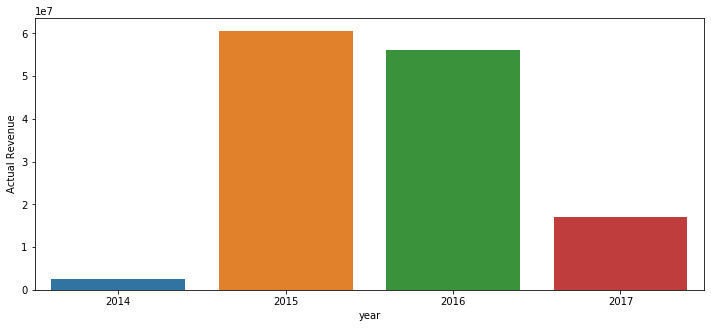

In [213]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_year_rev,x='year',y='revenue')
plt.ylabel('Actual Revenue');

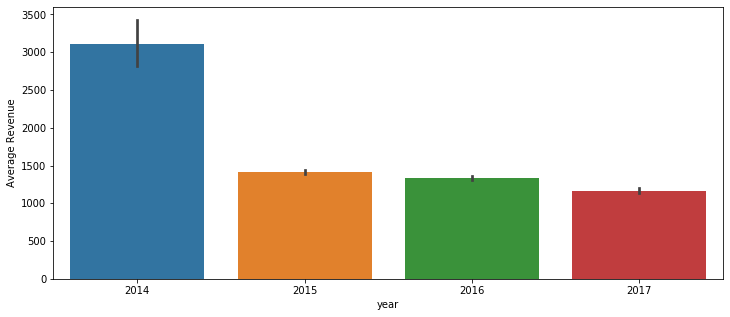

In [212]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='year',y='revenue')
plt.ylabel('Average Revenue');

In [215]:
df_year_sales = df[['sales','gender']].groupby(df['year']).sum().sort_values(by='sales',ascending=False).reset_index()
df_year_sales

,year,sales
0,2015,2505760
1,2016,2392740
2,2017,701670
3,2014,78010


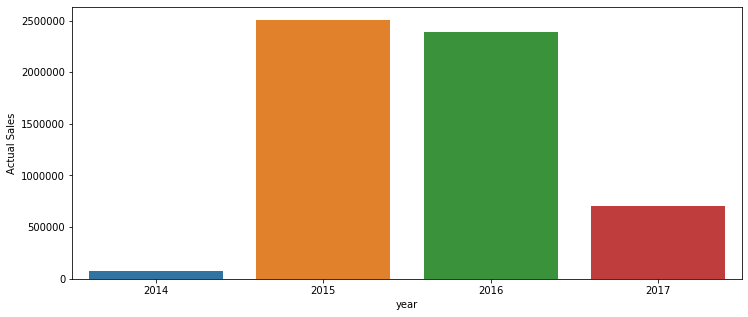

In [220]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_year_sales,x='year',y='sales')
plt.ylabel('Actual Sales');

In [222]:
df['retailweek'] = pd.to_datetime(df['retailweek'],infer_datetime_format=True)

In [225]:
df_series = df[['revenue','gender']].groupby(df['retailweek']).sum()

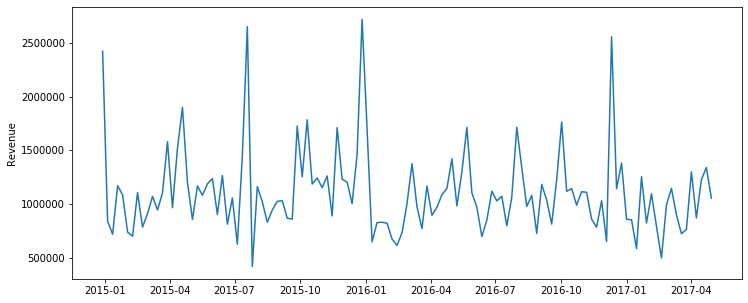

In [229]:
plt.figure(figsize=(12,5))
plt.plot(df_series)
plt.ylabel('Revenue');



In [243]:
df_categ = df[['revenue','gender']].groupby(df['category']).sum().reset_index()

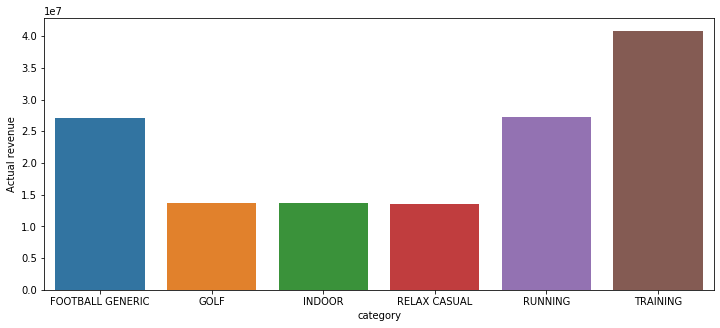

In [244]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_categ,x='category',y='revenue')
plt.ylabel('Actual revenue');

In [245]:
df_productgroup = df[['revenue','gender']].groupby(df['productgroup']).sum().reset_index()
df_productgroup

,productgroup,revenue
0,HARDWARE ACCESSORIES,2.731296e+07
1,SHOES,8.147169e+07
2,SHORTS,1.364853e+07
3,SWEATSHIRTS,1.362943e+07


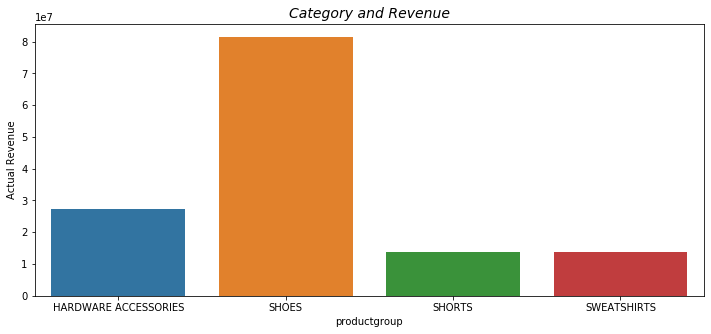

In [246]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_productgroup,x='productgroup',y='revenue')
plt.ylabel('Actual Revenue')
plt.title('Category and Revenue',fontsize=14,style='italic');

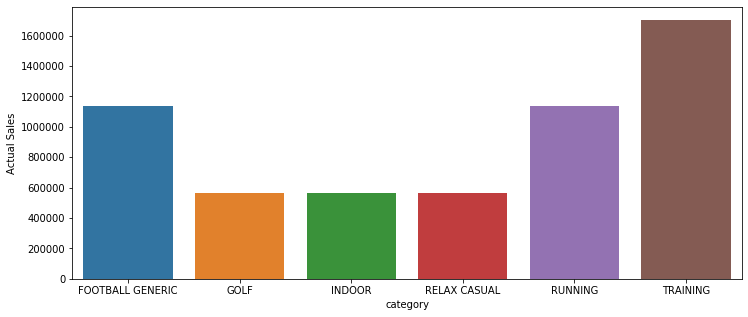

In [247]:
df_categ = df[['sales','gender']].groupby(df['category']).sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=df_categ,x='category',y='sales')
plt.ylabel('Actual Sales');

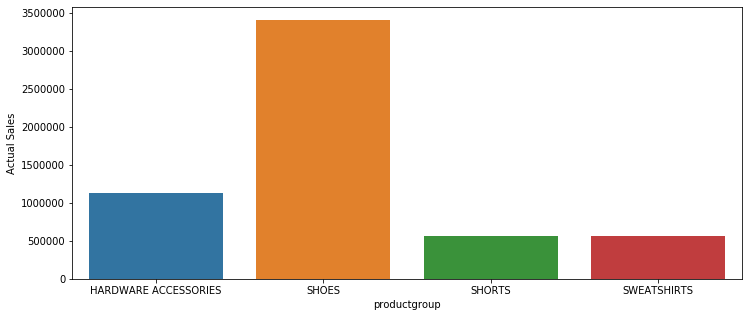

In [248]:
df_categ = df[['sales','gender']].groupby(df['productgroup']).sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=df_categ,x='productgroup',y='sales')
plt.ylabel('Actual Sales');

##### Training Category, and football generic category returns the highest revenue, and for product group shoes and hardware accessories are the highest sales. 

In [250]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2016,97.31
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,2016,108.31
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2016,108.90
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2016,101.60
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2016,101.00


In [270]:
df_label_prop = df['label'].groupby(df['label']).count() / df.shape[0]
df_label_prop

label
0    0.86072
1    0.13928
Name: label, dtype: float64

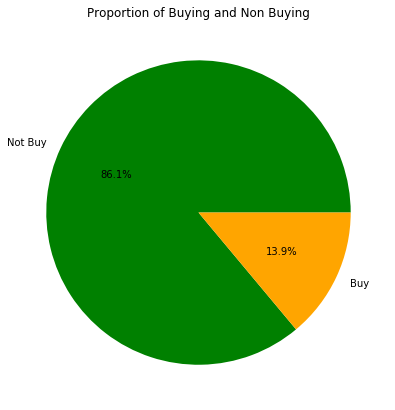

In [269]:
df_label_prop = df['label'].value_counts(normalize=True)
plt.figure(figsize=(16,7))
plt.pie(df_label_prop ,labels=['Not Buy','Buy'],
       autopct='%1.1f%%',
       colors=['g','orange'])
plt.title('Proportion of Buying and Non Buying');

In [271]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2016,97.31
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,2016,108.31
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2016,108.90
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2016,101.60
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2016,101.00


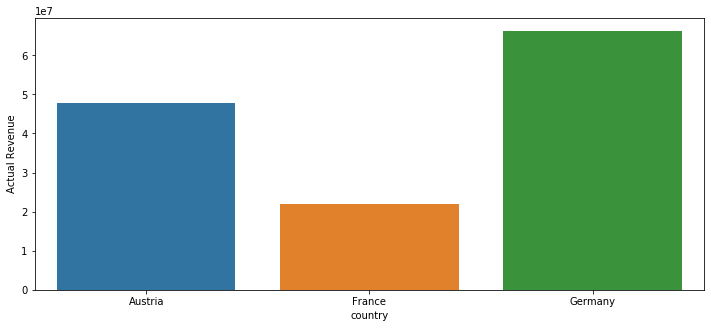

In [274]:
df_country_rev = df[['revenue','gender']].groupby(df['country']).sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=df_country_rev,x='country',y='revenue')
plt.ylabel('Actual Revenue');

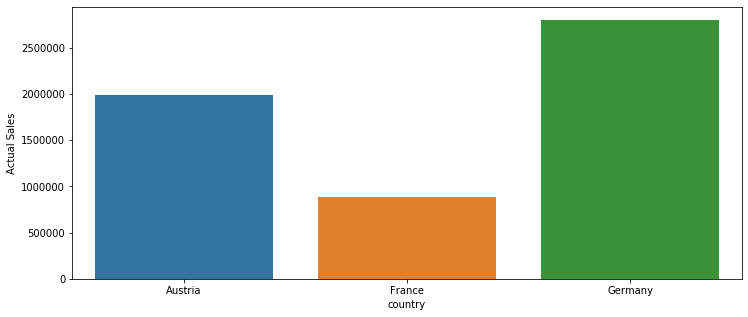

In [273]:
df_country_sales = df[['sales','gender']].groupby(df['country']).sum().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=df_country_sales,x='country',y='sales')
plt.ylabel('Actual Sales');

##### Obviously Germany has the highest sales & revenue as well. followed by Austria

In [275]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2016,97.31
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,2016,108.31
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2016,108.90
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2016,101.60
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2016,101.00


In [304]:
df_article = df[['revenue','gender']].groupby(df['article']).sum().head(30).reset_index().sort_values(by='revenue',ascending=False)
df_article

,article,revenue
4,AD9697,1034236.74
1,AA7884,863588.82
8,AL2298,710269.26
14,AQ1643,684701.77
3,AC7347,582553.07
22,AZ6626,511629.44
7,AJ7542,491472.57
27,BF7459,472374.26
2,AA8941,463135.78
6,AH6675,400296.24


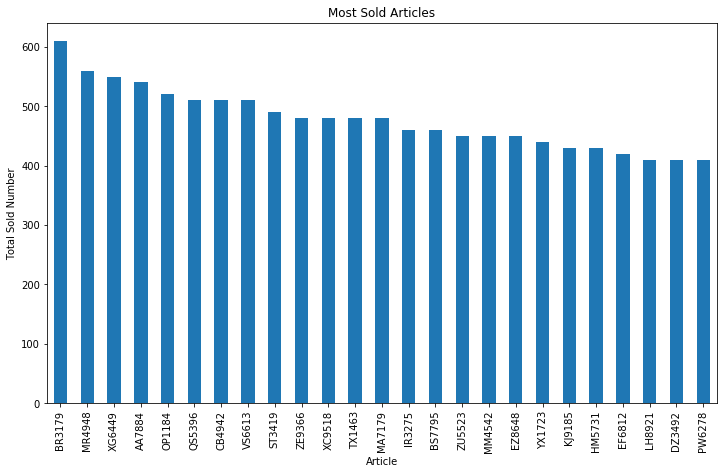

In [288]:
df_article = df[['article','gender']].groupby(df['revenue'])
plt.title('Most Sold Articles')
plt.xlabel('Article')
plt.ylabel('Total Sold Number');

##### we can see that BR3179 article is the most sold followed by MR4948

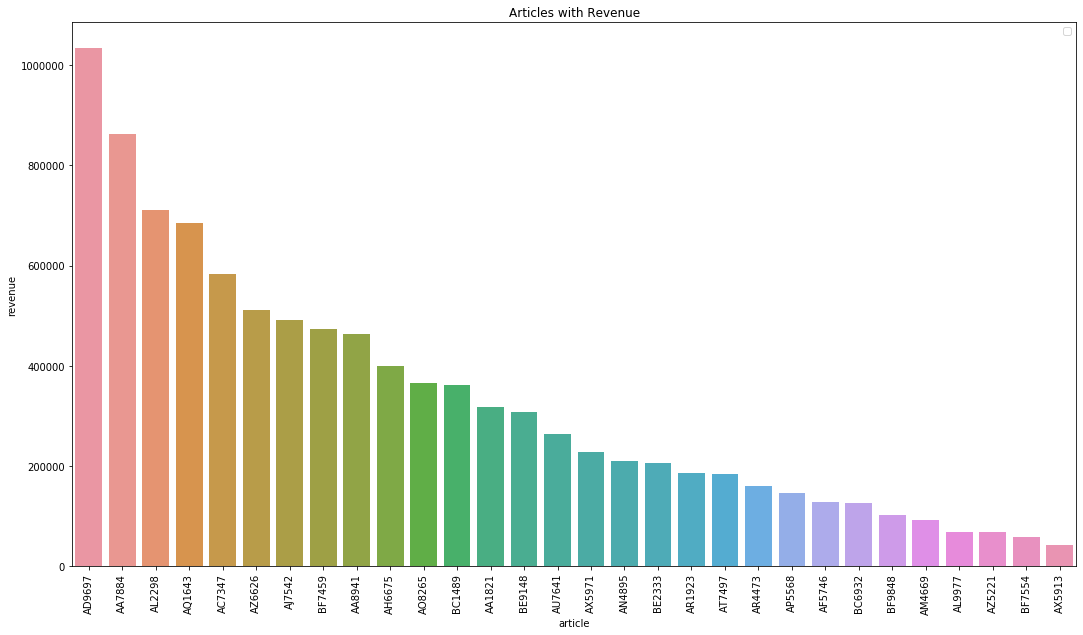

In [312]:
plt.figure(figsize=(18,10))
labels=['Buy','Not Buy']
ax = sns.barplot(data=df_article,x='article',y='revenue')
ax.set_title('Articles with Revenue')
plt.xticks(rotation=90)
a, d  = ax.get_legend_handles_labels()
ax.legend(a,labels);


In [1275]:
df.query('article=="AA7884"')

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
250,Germany,AA7884,46,42.95,12.95,0.301513,2015-04-19,0,0,508.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2015,582.41
251,Germany,AA7884,46,42.95,12.95,0.301513,2015-04-19,0,0,508.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,2015,593.41
252,Germany,AA7884,46,42.95,12.95,0.301513,2015-04-19,0,0,508.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2015,594.00
253,Germany,AA7884,46,42.95,12.95,0.301513,2015-04-19,0,0,508.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2015,586.70
254,Germany,AA7884,46,42.95,12.95,0.301513,2015-04-19,0,0,508.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2015,586.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96725,France,AA7884,96,42.95,24.95,0.580908,2015-07-05,0,0,3499.0,TX1463,SWEATSHIRTS,TRAINING,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0,2015,2391.00
96726,France,AA7884,96,42.95,24.95,0.580908,2015-07-05,0,0,3499.0,PC6383,SHOES,FOOTBALL GENERIC,9.90,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,1,2015,2385.30
96727,France,AA7884,96,42.95,24.95,0.580908,2015-07-05,0,0,3499.0,VT7698,SHOES,INDOOR,5.20,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,1,2015,2390.00
96728,France,AA7884,96,42.95,24.95,0.580908,2015-07-05,0,0,3499.0,FG2965,HARDWARE ACCESSORIES,RUNNING,1.29,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0,2015,2393.91


##### The most article brings the highest revenue is AD9697, followed by AA7884

In [315]:
df_article_sales = df[['sales','gender']].groupby(df['article']).sum().head(30).reset_index().sort_values(by='sales',ascending=False)
df_article_sales

,article,sales
1,AA7884,42640
27,BF7459,22840
14,AQ1643,20400
6,AH6675,18780
23,BC1489,18400
18,AU7641,16660
17,AT7497,15500
7,AJ7542,15150
13,AP5568,15100
8,AL2298,14740


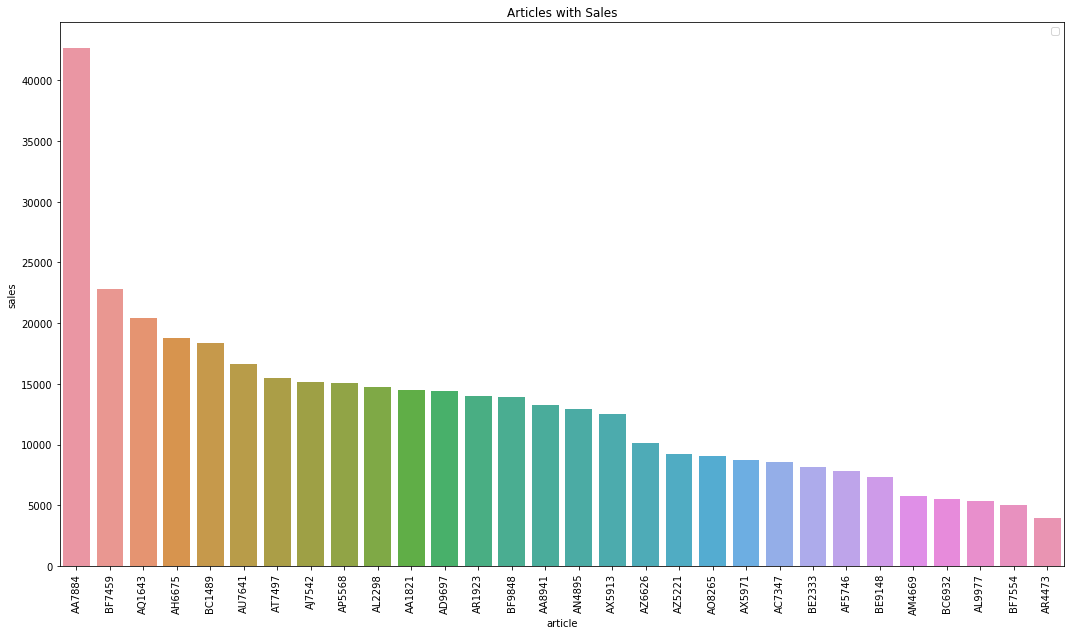

In [316]:
plt.figure(figsize=(18,10))
ax = sns.barplot(data=df_article_sales,x='article',y='sales')
ax.set_title('Articles with Sales')
plt.xticks(rotation=90)
a, d  = ax.get_legend_handles_labels()
ax.legend(a,labels);


##### We can see that the second highest articles brings revenue(AA7884), is the highes article in sales by 42640 piece

In [323]:
df_categ_sales = df[['sales','gender']].groupby(df['category']).sum().reset_index().sort_values(by='sales',ascending=False)
df_categ_sales

,category,sales
5,TRAINING,1703454
0,FOOTBALL GENERIC,1135636
4,RUNNING,1135636
1,GOLF,567818
2,INDOOR,567818
3,RELAX CASUAL,567818


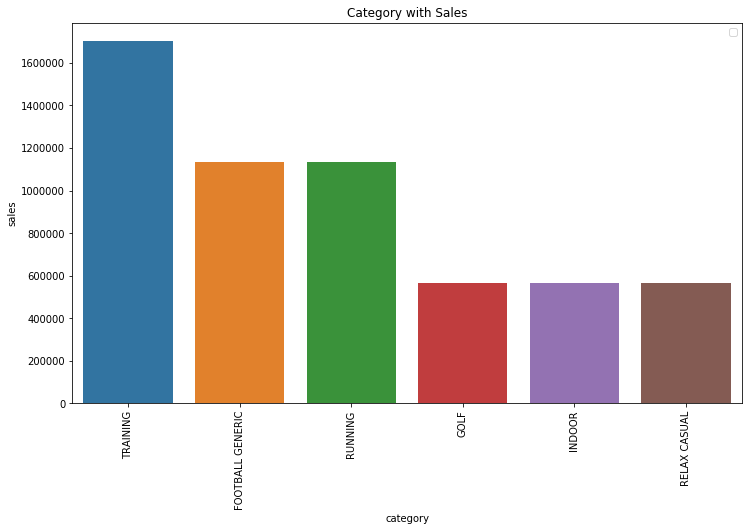

In [328]:
plt.figure(figsize=(12,7))
ax = sns.barplot(data=df_categ_sales,x='category',y='sales')
ax.set_title('Category with Sales')
plt.xticks(rotation=90)
a, d  = ax.get_legend_handles_labels()
ax.legend(a,labels);


df['total_promo'] = df['promo1'] + df['promo2']

In [1278]:
france_promo_mean = df[['total_promo','customer_id']].groupby(df['country']).mean()
france_promo_mean

,total_promo
country,
Austria,0.064599
France,0.089909
Germany,0.061134


In [324]:
df_categ_rev = df[['revenue','gender']].groupby(df['category']).sum().reset_index().sort_values(by='revenue',ascending=False)
df_categ_rev

,category,revenue
5,TRAINING,4.081650e+07
4,RUNNING,2.723996e+07
0,FOOTBALL GENERIC,2.715686e+07
1,GOLF,1.365443e+07
2,INDOOR,1.361943e+07
3,RELAX CASUAL,1.357543e+07


###### However France getting the highest promotion average through years, Germany has the highest sales and revenue among those countries

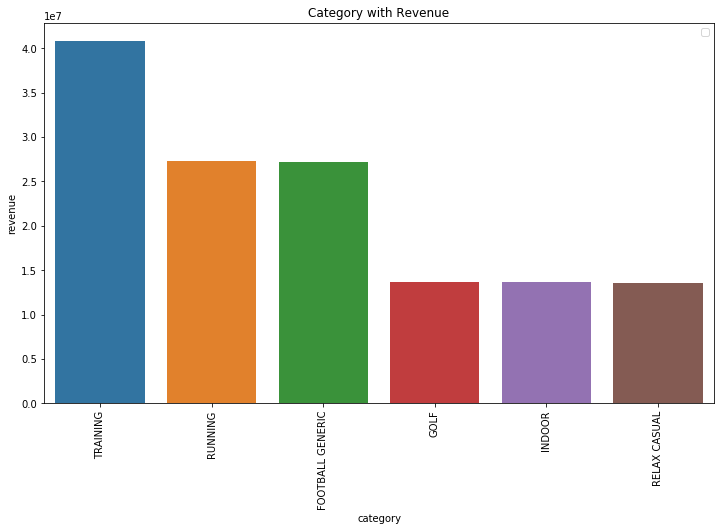

In [329]:
plt.figure(figsize=(12,7))
ax = sns.barplot(data=df_categ_rev,x='category',y='revenue')
ax.set_title('Category with Revenue')
plt.xticks(rotation=90)
a, d  = ax.get_legend_handles_labels()
ax.legend(a,labels);


##### Training and football Generic are the highest categories in sales. However, Runniung  category makes more revenue than football generic

In [325]:
df_prod_sales = df[['sales','gender']].groupby(df['productgroup']).sum().reset_index().sort_values(by='sales',ascending=False)
df_prod_sales

,productgroup,sales
1,SHOES,3406908
0,HARDWARE ACCESSORIES,1135636
2,SHORTS,567818
3,SWEATSHIRTS,567818


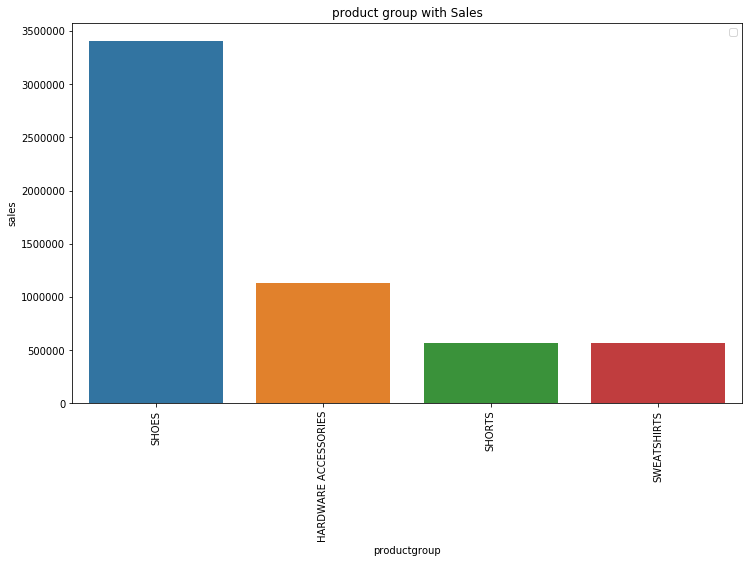

In [330]:
plt.figure(figsize=(12,7))
ax = sns.barplot(data=df_prod_sales,x='productgroup',y='sales')
ax.set_title('product group with Sales')
plt.xticks(rotation=90)
a, d  = ax.get_legend_handles_labels()
ax.legend(a,labels);


In [331]:
df_prod_rev = df[['revenue','gender']].groupby(df['productgroup']).sum().reset_index().sort_values(by='revenue',ascending=False)
df_prod_rev

,productgroup,revenue
1,SHOES,8.147169e+07
0,HARDWARE ACCESSORIES,2.731296e+07
2,SHORTS,1.364853e+07
3,SWEATSHIRTS,1.362943e+07


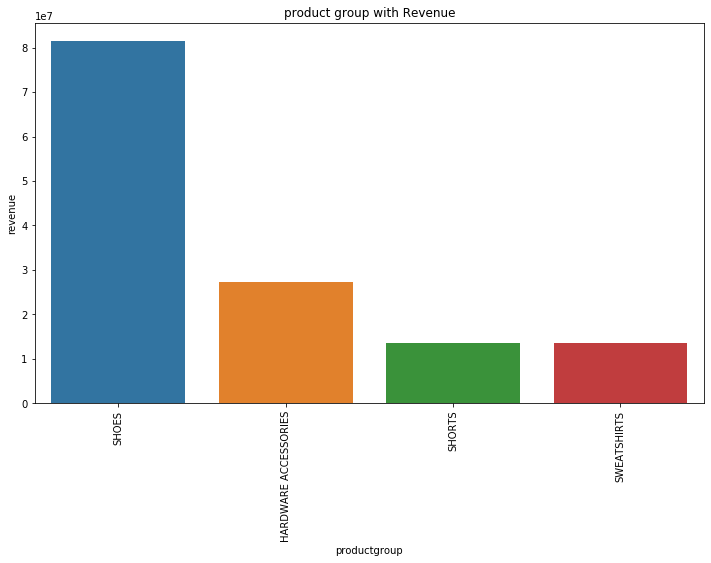

In [335]:
plt.figure(figsize=(12,7))
ax = sns.barplot(data=df_prod_rev,x='productgroup',y='revenue')
ax.set_title('product group with Revenue')
plt.xticks(rotation=90);



##### Shoes are making the highest sales and revenue among other products, followed by Hardware Accessories

In [336]:
df_buy = df.query('label==1')

In [337]:
df_buy

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
5,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,TX1463,SWEATSHIRTS,TRAINING,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,1,2016,106.40
7,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,VT7698,SHOES,INDOOR,5.20,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,1,2016,105.40
9,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AC7347,SHOES,FOOTBALL GENERIC,8.70,regular,"xxs,xs,s,m,l,xl,xxl",men,139,137,137,205,155,155,1,2016,101.90
13,Germany,CF3238,27,37.95,28.95,0.762846,2015-01-25,0,0,1649.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,1,2015,772.65
15,Germany,CF3238,27,37.95,28.95,0.762846,2015-01-25,0,0,1649.0,TX1463,SWEATSHIRTS,TRAINING,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,1,2015,777.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,France,AC7347,10,153.95,87.95,0.571289,2016-04-03,0,0,3472.0,AC7347,SHOES,FOOTBALL GENERIC,8.70,regular,"xxs,xs,s,m,l,xl,xxl",men,139,137,137,205,155,155,1,2016,870.80
99983,Germany,BF7459,432,35.95,22.95,0.638387,2014-12-28,1,0,872.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,1,2014,9905.40
99984,Germany,BF7459,432,35.95,22.95,0.638387,2014-12-28,1,0,872.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,1,2014,9904.80
99988,Germany,BF7459,432,35.95,22.95,0.638387,2014-12-28,1,0,872.0,FG2965,HARDWARE ACCESSORIES,RUNNING,1.29,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,1,2014,9913.11


In [390]:
temp1 = df[['customer_id','label']].groupby(['customer_id'],as_index=False).count()
temp1 = temp1.rename(columns={'label':'total_purchase'}).sort_values(by='total_purchase',ascending=False)[:30]
temp1

,customer_id,total_purchase
703,1692.0,80
114,1111.0,80
270,1264.0,80
597,1586.0,70
998,1983.0,70
2621,4331.0,70
987,1972.0,70
160,1157.0,70
696,1686.0,70
2580,429.0,70


In [389]:
temp2 = df[['revenue','gender']].groupby(df['customer_id']).sum()[:30].sort_values(by='revenue',ascending=False).reset_index()
temp2

,customer_id,revenue
0,1025.0,189841.48
1,102.0,100714.48
2,1014.0,71796.32
3,1010.0,58761.66
4,1017.0,56353.99
5,1007.0,55645.99
6,1013.0,48909.98
7,1000.0,48498.32
8,1023.0,48038.83
9,1008.0,32080.99


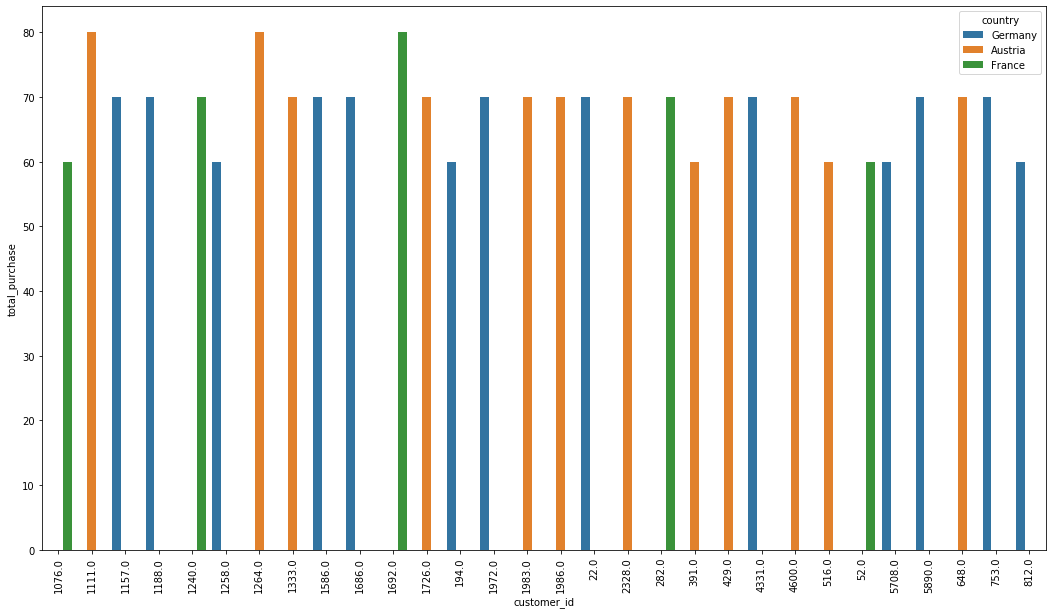

In [366]:
plt.figure(figsize=(18,10))
sns.barplot(data=temp1 ,x='customer_id',y='total_purchase',hue=df['country'])
plt.xticks(rotation=90);

#### Highest orders count comin from customer in France and Austria

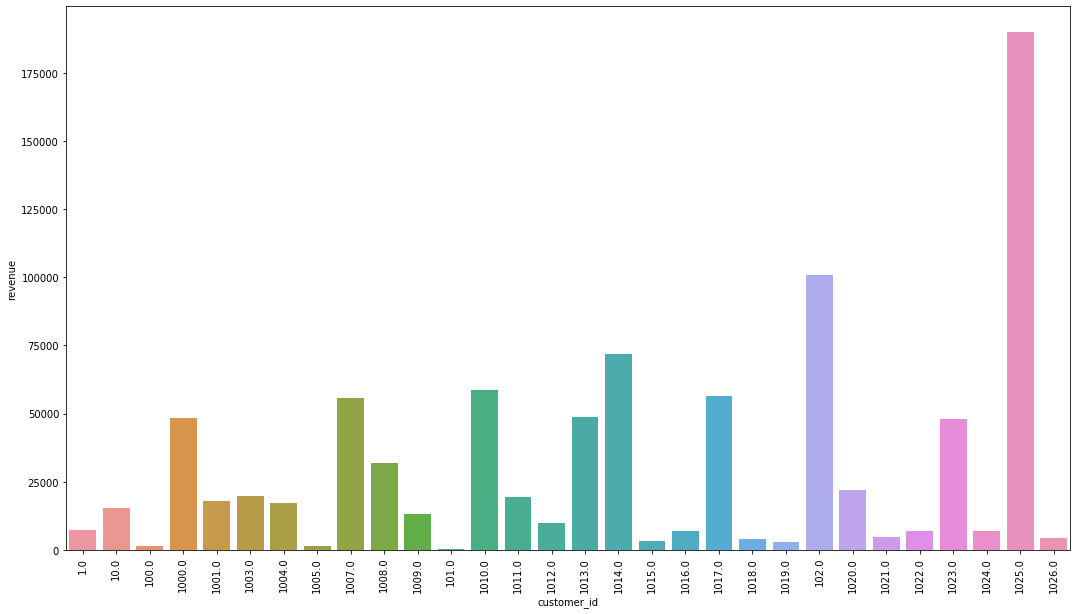

In [391]:
plt.figure(figsize=(18,10))
sns.barplot(data=temp2 ,x='customer_id',y='revenue')
plt.xticks(rotation=90);

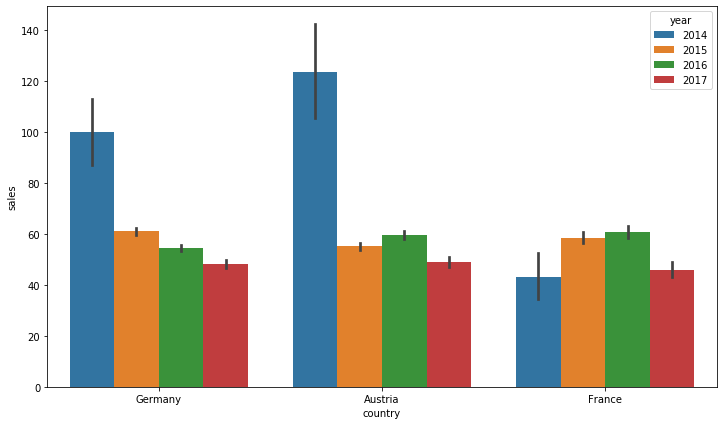

In [394]:
plt.figure(figsize=(12,7))
sns.barplot(data=df,x='country',y='sales',hue='year');

In [409]:
df_country_rev

,country,revenue
0,Austria,4.792389e+07
1,France,2.189735e+07
2,Germany,6.624138e+07


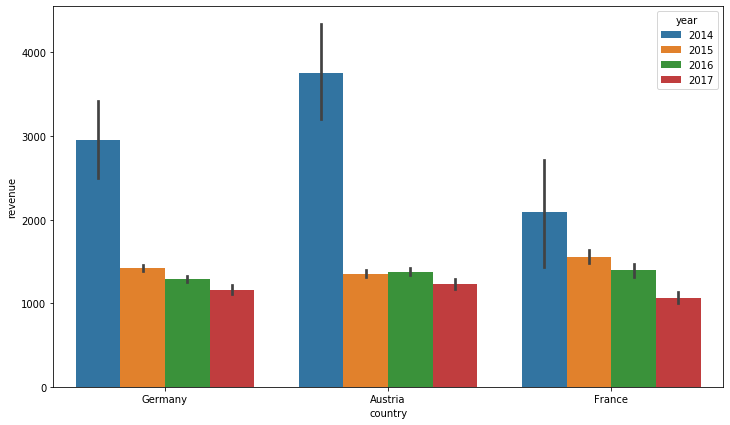

In [416]:
plt.figure(figsize=(12,7))
sns.barplot(data=df,x='country',y='revenue',hue=df['year']);

##### We can see that the average revenue cominfg from Germany is highest in 2014 and gradually decreased through years until 2017

##### For Austria 2017 also has the least average revenue, with the highest average in 2014, same in France which has the lowest revenue average in 2017

##### We can see that in 2014 the highest standard deviation of revenue in all countries

In [397]:
df_2014 = df.query('year==2014')
df_2014

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
1670,France,VF7316,8,63.95,45.95,0.718530,2014-12-28,1,0,2767.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2014,354.31
1671,France,VF7316,8,63.95,45.95,0.718530,2014-12-28,1,0,2767.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,1,2014,365.31
1672,France,VF7316,8,63.95,45.95,0.718530,2014-12-28,1,0,2767.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2014,365.90
1673,France,VF7316,8,63.95,45.95,0.718530,2014-12-28,1,0,2767.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,1,2014,358.60
1674,France,VF7316,8,63.95,45.95,0.718530,2014-12-28,1,0,2767.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2014,358.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,Germany,BF7459,432,35.95,22.95,0.638387,2014-12-28,1,0,872.0,TX1463,SWEATSHIRTS,TRAINING,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0,2014,9910.20
99986,Germany,BF7459,432,35.95,22.95,0.638387,2014-12-28,1,0,872.0,PC6383,SHOES,FOOTBALL GENERIC,9.90,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0,2014,9904.50
99987,Germany,BF7459,432,35.95,22.95,0.638387,2014-12-28,1,0,872.0,VT7698,SHOES,INDOOR,5.20,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,0,2014,9909.20
99988,Germany,BF7459,432,35.95,22.95,0.638387,2014-12-28,1,0,872.0,FG2965,HARDWARE ACCESSORIES,RUNNING,1.29,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,1,2014,9913.11


In [405]:
df_2014_1 = df_2014[['revenue','customer_id']].groupby(df_2014['category']).sum().reset_index().sort_values(by='revenue',ascending=False)
df_2014_1

,category,revenue
5,TRAINING,726923.01
4,RUNNING,484841.28
0,FOOTBALL GENERIC,484193.10
1,GOLF,242689.35
2,INDOOR,242416.35
3,RELAX CASUAL,242073.15


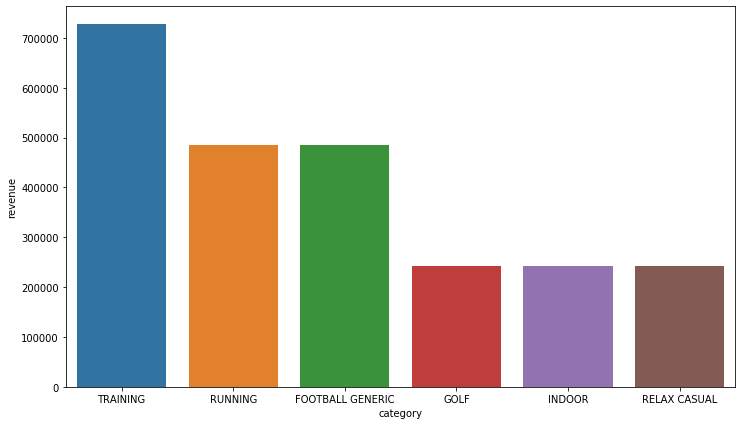

In [410]:
plt.figure(figsize=(12,7))
sns.barplot(data=df_2014_1,x='category',y='revenue');

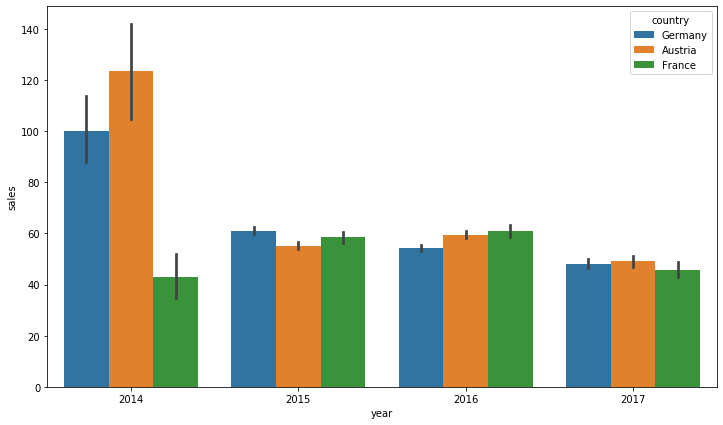

In [442]:
plt.figure(figsize=(12,7))
sns.barplot(data=df,x='year',y='sales',hue='country');

In [1295]:
df_coun_cat = df[['sales','customer_id',]].groupby(df['country']).sum().reset_index().sort_values(by='sales',ascending=False)
df_coun_cat

,country,sales
2,Germany,2799120
0,Austria,1992300
1,France,886760


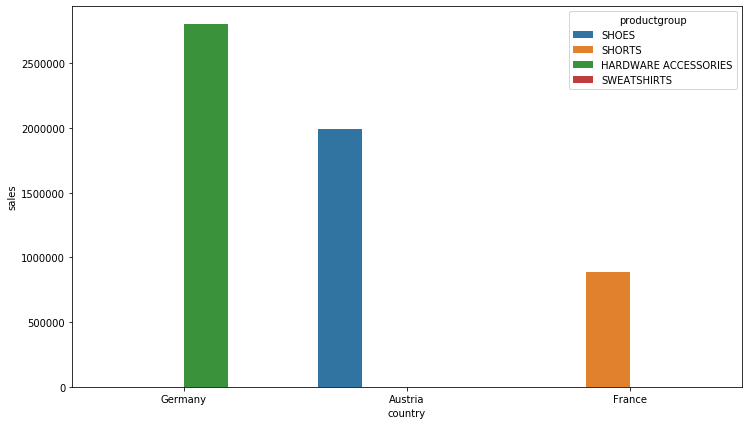

In [1297]:
plt.figure(figsize=(12,7))
sns.barplot(data=df_coun_cat,x='country',y='sales',hue=df['productgroup']);

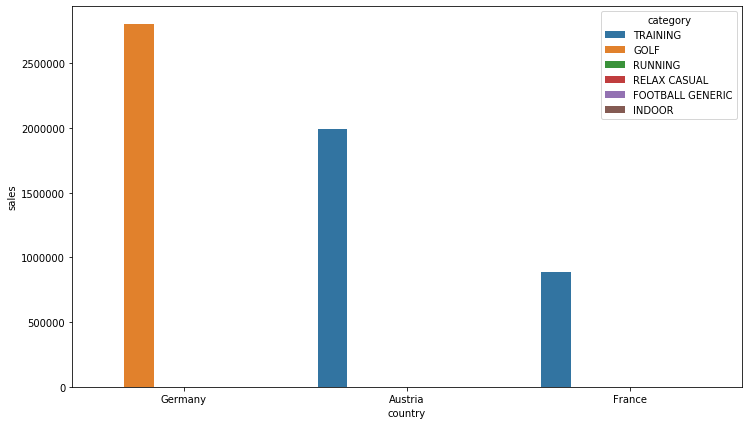

In [1298]:
plt.figure(figsize=(12,7))
sns.barplot(data=df_coun_cat,x='country',y='sales',hue=df['category']);

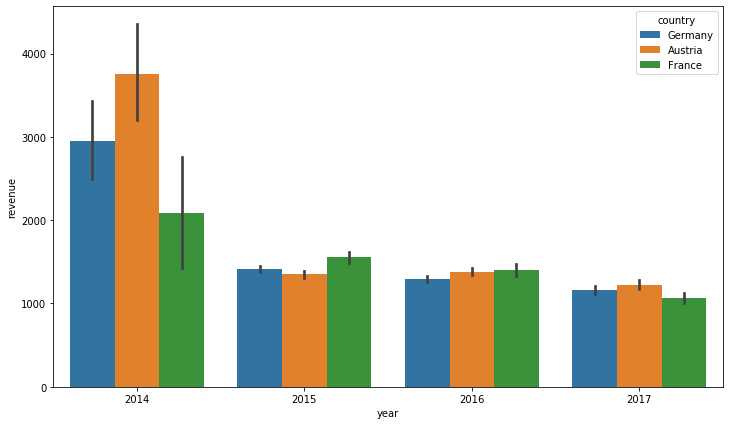

In [443]:
plt.figure(figsize=(12,7))
sns.barplot(data=df,x='year',y='revenue',hue='country');

In [421]:
df.groupby('year')['sales'].sum().sort_values(ascending=False)

year
2015    2505760
2016    2392740
2017     701670
2014      78010
Name: sales, dtype: int64

In [422]:
df.groupby('year')['revenue'].sum().sort_values(ascending=False)

year
2015    6.055882e+07
2016    5.603510e+07
2017    1.704557e+07
2014    2.423136e+06
Name: revenue, dtype: float64

In [437]:
te = df[['revenue','year','sales']].groupby(['year']).sum().reset_index()
te

,year,revenue,sales
0,2014,2.423136e+06,78010
1,2015,6.055882e+07,2505760
2,2016,5.603510e+07,2392740
3,2017,1.704557e+07,701670


##### Obviously from the above analysis, that revenue and sales average through years are highest in 2014 and least in 2017, which clearly says that we have a serious problem in marketing, but overall due to the total sales values in 2015 & 2016 is relatively too high compared to 2014, so the actual total revenue is much bigeer than 2014 and 2017 which have least total sales values.

## Feature Engineering 

In [444]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2016,97.31
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,2016,108.31
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2016,108.90
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2016,101.60
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2016,101.00


In [445]:
df.drop(columns='article.1',inplace=True)

In [448]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2016,97.31
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,2016,108.31
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2016,108.90
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2016,101.60
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2016,101.00


In [449]:
df.corr()

,sales,regular_price,current_price,ratio,promo1,promo2,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
sales,1.000000e+00,5.175875e-03,-1.205093e-01,-2.704180e-01,1.148382e-01,-2.480468e-03,-2.929382e-18,4.545262e-16,7.730616e-17,1.097346e-16,1.766546e-16,4.656323e-17,1.916328e-16,-0.116651,-4.285468e-02,0.745137
regular_price,5.175875e-03,1.000000e+00,8.409200e-01,-4.321212e-02,-3.695493e-03,1.314716e-03,1.229574e-17,-2.581730e-16,1.878813e-17,-6.454673e-17,-3.200812e-16,-2.215911e-16,-6.570035e-17,-0.015027,-1.059672e-02,0.334184
current_price,-1.205093e-01,8.409200e-01,1.000000e+00,4.127533e-01,5.966158e-02,1.657370e-02,2.726772e-18,-2.705198e-16,1.084192e-16,-1.106159e-16,-5.544430e-16,-4.156394e-16,-8.639914e-17,0.183402,7.954656e-03,0.236355
ratio,-2.704180e-01,-4.321212e-02,4.127533e-01,1.000000e+00,1.443172e-01,3.511546e-02,-2.851908e-18,-2.743519e-16,-5.070546e-17,-9.958338e-17,-3.624401e-16,1.103201e-16,-2.094732e-16,0.447122,3.231116e-02,-0.075035
promo1,1.148382e-01,-3.695493e-03,5.966158e-02,1.443172e-01,1.000000e+00,4.734652e-02,-1.507672e-17,1.448207e-16,9.497750e-17,-2.577039e-17,5.113318e-18,-7.841475e-16,2.292994e-16,0.064105,-1.373264e-01,0.145977
promo2,-2.480468e-03,1.314716e-03,1.657370e-02,3.511546e-02,4.734652e-02,1.000000e+00,8.109669e-18,-5.923813e-16,-2.043189e-16,-1.718655e-16,-2.060884e-16,2.577079e-16,-3.401877e-16,0.020165,1.509802e-02,0.006089
cost,-2.929382e-18,1.229574e-17,2.726772e-18,-2.851908e-18,-1.507672e-17,8.109669e-18,1.000000e+00,4.829037e-03,-7.337551e-01,-1.102127e-01,-1.785002e-01,1.189099e-01,2.400004e-02,0.002130,2.299141e-16,-0.001497
rgb_r_main_col,4.545262e-16,-2.581730e-16,-2.705198e-16,-2.743519e-16,1.448207e-16,-5.923813e-16,4.829037e-03,1.000000e+00,2.278015e-01,-5.307091e-01,5.864479e-01,1.695861e-02,3.448846e-01,-0.001328,-1.590058e-16,-0.000007
rgb_g_main_col,7.730616e-17,1.878813e-17,1.084192e-16,-5.070546e-17,9.497750e-17,-2.043189e-16,-7.337551e-01,2.278015e-01,1.000000e+00,1.730695e-01,3.742056e-01,-1.230575e-01,8.089808e-02,-0.007542,-3.617867e-17,0.001099
rgb_b_main_col,1.097346e-16,-6.454673e-17,-1.106159e-16,-9.958338e-17,-2.577039e-17,-1.718655e-16,-1.102127e-01,-5.307091e-01,1.730695e-01,1.000000e+00,-6.747120e-01,1.253612e-01,-2.461951e-01,-0.001214,-9.723238e-17,0.000165


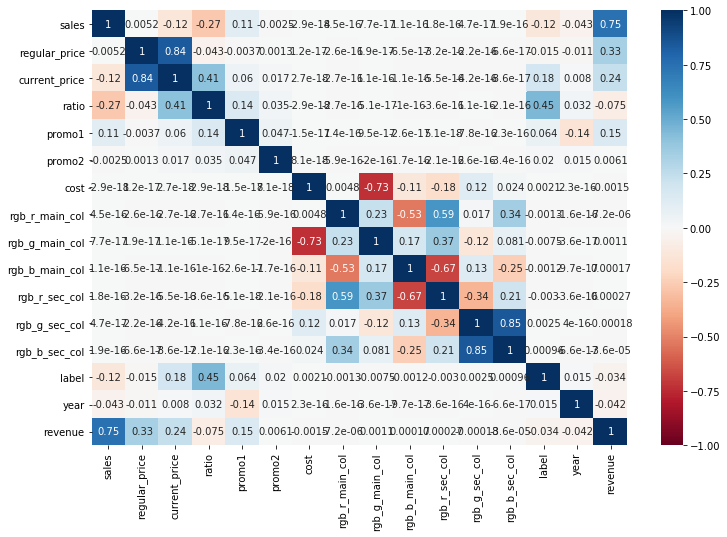

In [454]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='RdBu')

##### From this correlation chart we can figure that current price & regulary price , Revenue&Sales, rgb_b_sec_col & rgb_g_sec_col  all are having strong positive realtionships, while cost & rgb_g_main_col have strong negative relationship

### P-value Statistical Significance

In [458]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue,intercept
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2016,97.31,1
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,2016,108.31,1
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2016,108.90,1
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2016,101.60,1
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2016,101.00,1


In [456]:
import statsmodels.api as sm

In [457]:
df['intercept'] = 1

In [460]:
x = df[['intercept','sales','promo1','promo2','cost','year']]
y = df['label']

In [461]:
model = sm.Logit(y,x)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.389200
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.036     
Dependent Variable: label            AIC:              77852.0318
Date:               2022-04-15 06:01 BIC:              77909.1094
No. Observations:   100000           Log-Likelihood:   -38920.   
Df Model:           5                LL-Null:          -40365.   
Df Residuals:       99994            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
-----------------------------------------------------------------
intercept  -162.8415  25.9290  -6.2803 0.0000 -213.6613 -112.0216
sales        -0.0089   0.0002 -38.7582 0.0000   -0.0093   -0.0084
promo1        0.9116   0.0337  27.0810 0.0000    0.8456    0.9775
promo2        0.4804   0.1097   4.3797 0.0000    0.2654    0.6954
cost          0.0016   0.0024   0.6825 0.4949   -0.0030    0.0062
year          0.0800   0.0129   6.2214 0.0000    0.0548    0.1052
=================================================================

"""

#### Obviously from the p-value, we can say that sales,promotion, and year have a statistical significance with our target labels

### Preprocessing

In [1136]:
# Make a copy of the original dataframe
df_new = df.copy()

In [1137]:
df_new

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,article.1,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label,year,revenue
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,OC6355,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0,2016,97.31
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,AP5568,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0,2016,108.31
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,CB8861,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0,2016,108.90
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,LI3529,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0,2016,101.60
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,GG8661,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0,2016,101.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,TX1463,SWEATSHIRTS,TRAINING,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0,2016,6113.45
99996,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,PC6383,SHOES,FOOTBALL GENERIC,9.90,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0,2016,6107.75
99997,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,VT7698,SHOES,INDOOR,5.20,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,0,2016,6112.45
99998,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,FG2965,HARDWARE ACCESSORIES,RUNNING,1.29,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0,2016,6116.36


In [1138]:
# Dropping unwanted columns for the Ml model 
df_new.drop(columns=['article.1','customer_id','retailweek','ratio','rgb_b_sec_col','revenue','article','year'],axis=1,inplace=True)

In [1139]:
df_new

,country,sales,regular_price,current_price,promo1,promo2,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,label
0,Germany,28,5.95,3.95,0,0,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,0
1,Germany,28,5.95,3.95,0,0,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,0
2,Germany,28,5.95,3.95,0,0,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,0
3,Germany,28,5.95,3.95,0,0,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,0
4,Germany,28,5.95,3.95,0,0,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,227,57.95,26.95,0,0,SWEATSHIRTS,TRAINING,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,0
99996,Germany,227,57.95,26.95,0,0,SHOES,FOOTBALL GENERIC,9.90,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,0
99997,Germany,227,57.95,26.95,0,0,SHOES,INDOOR,5.20,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,0
99998,Germany,227,57.95,26.95,0,0,HARDWARE ACCESSORIES,RUNNING,1.29,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,0


In [1140]:
to_dummy_list = ['country','productgroup','category','style','gender','sizes']

In [1141]:
def todummy(data,dummylist):
    for i in to_dummy_list:
        dummies = pd.get_dummies(data[i],prefix= i ,dummy_na=False)
        data = data.drop(i,1)
        data = pd.concat([data,dummies],axis=1)
    return data

In [1142]:
X = todummy(df_new,to_dummy_list)

In [1143]:
X = X.drop('label',axis=1)

In [1144]:
y = df_new['label']

In [1145]:
X

,sales,regular_price,current_price,promo1,promo2,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,country_Austria,country_France,country_Germany,productgroup_HARDWARE ACCESSORIES,productgroup_SHOES,productgroup_SHORTS,productgroup_SWEATSHIRTS,category_FOOTBALL GENERIC,category_GOLF,category_INDOOR,category_RELAX CASUAL,category_RUNNING,category_TRAINING,style_regular,style_slim,style_wide,gender_kids,gender_men,gender_unisex,gender_women,"sizes_xs,s,m,l,xl","sizes_xxs,xs,s,m,l,xl,xxl"
0,28,5.95,3.95,0,0,13.29,205,104,57,255,187,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
1,28,5.95,3.95,0,0,2.29,188,238,104,255,187,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1
2,28,5.95,3.95,0,0,1.70,205,173,0,255,187,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
3,28,5.95,3.95,0,0,9.00,205,140,149,164,211,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
4,28,5.95,3.95,0,0,9.60,138,43,226,164,211,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,227,57.95,26.95,0,0,4.20,79,148,205,164,211,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
99996,227,57.95,26.95,0,0,9.90,139,26,26,205,155,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
99997,227,57.95,26.95,0,0,5.20,135,206,250,205,155,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
99998,227,57.95,26.95,0,0,1.29,181,181,181,205,155,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1


In [1146]:
y.value_counts()

0    86072
1    13928
Name: label, dtype: int64

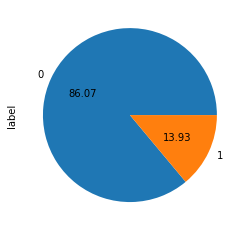

In [1147]:
# Imbalanced Class label
y.value_counts().plot.pie(autopct='%.2f');

## Sampling (Imbalanced Class)

In [1301]:
from imblearn.under_sampling import RandomUnderSampler

In [1302]:
rus = RandomUnderSampler(sampling_strategy=1)
x_res,y_res = rus.fit_resample(X,y)



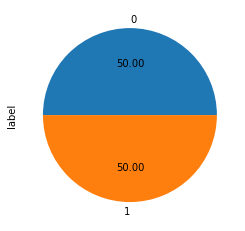

In [1307]:
y_res.value_counts().plot.pie(autopct='%.2f');

In [1308]:
X = x_res

In [1309]:
y = y_res

In [1153]:
print(X.shape)
print(y.shape)

(27856, 33)
(27856,)


In [1154]:
X

,sales,regular_price,current_price,promo1,promo2,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,country_Austria,country_France,country_Germany,productgroup_HARDWARE ACCESSORIES,productgroup_SHOES,productgroup_SHORTS,productgroup_SWEATSHIRTS,category_FOOTBALL GENERIC,category_GOLF,category_INDOOR,category_RELAX CASUAL,category_RUNNING,category_TRAINING,style_regular,style_slim,style_wide,gender_kids,gender_men,gender_unisex,gender_women,"sizes_xs,s,m,l,xl","sizes_xxs,xs,s,m,l,xl,xxl"
0,47,43.95,17.95,0,0,8.70,139,137,137,205,155,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,52,3.95,1.95,0,0,8.70,139,137,137,205,155,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,64,29.95,21.95,1,0,8.70,139,137,137,205,155,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,95,26.95,15.95,1,0,1.29,181,181,181,205,155,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1
4,41,101.95,30.95,0,0,2.29,188,238,104,255,187,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27851,10,153.95,87.95,0,0,8.70,139,137,137,205,155,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
27852,432,35.95,22.95,1,0,9.00,205,140,149,164,211,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
27853,432,35.95,22.95,1,0,9.60,138,43,226,164,211,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
27854,432,35.95,22.95,1,0,1.29,181,181,181,205,155,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1


## Standardization

In [1155]:
scaler = StandardScaler()

In [1156]:
scaled_X = scaler.fit_transform(X)


In [1157]:
scaled_X 

array([[ 0.01133009, -0.21875857, -0.57717104, ..., -1.54158517,
        -0.32942379,  0.32942379],
       [ 0.07563024, -1.34378071, -1.20532642, ..., -1.54158517,
        -0.32942379,  0.32942379],
       [ 0.2299506 , -0.61251632, -0.42013219, ..., -1.54158517,
        -0.32942379,  0.32942379],
       ...,
       [ 4.9624417 , -0.443763  , -0.38087248, ...,  0.64868294,
        -0.32942379,  0.32942379],
       [ 4.9624417 , -0.443763  , -0.38087248, ...,  0.64868294,
        -0.32942379,  0.32942379],
       [ 4.9624417 , -0.443763  , -0.38087248, ..., -1.54158517,
        -0.32942379,  0.32942379]])

In [1158]:
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.2,random_state=24)

In [1159]:
x_train.shape

(22284, 33)

In [1160]:
x_test.shape

(5572, 33)

In [1161]:
y_train.shape

(22284,)

In [1162]:
y_test.shape

(5572,)

In [1163]:
x_test

array([[-0.1944304 ,  0.00624586,  0.2080232 , ..., -1.54158517,
        -0.32942379,  0.32942379],
       [-0.47735106, -0.78126964, -0.69495017, ...,  0.64868294,
        -0.32942379,  0.32942379],
       [-0.07869013, -0.72501853, -0.65569046, ...,  0.64868294,
        -0.32942379,  0.32942379],
       ...,
       [ 0.06277021, -0.80939519, -0.57717104, ...,  0.64868294,
        -0.32942379,  0.32942379],
       [ 0.6157515 ,  1.5531513 ,  1.54285339, ...,  0.64868294,
        -0.32942379,  0.32942379],
       [-0.13013025, -0.55626521, -0.77346959, ...,  0.64868294,
        -0.32942379,  0.32942379]])

## Logistic Regression Model 

In [1164]:
log_mod = LogisticRegression()

In [1165]:
log_mod.fit(x_train,y_train)

LogisticRegression()

In [1166]:
y_hat = log_mod.predict_proba(x_test)

In [1167]:
train_acc_lr = log_mod.score(x_train,y_train)
print('LR training Accuracy is' ,train_acc_lr)

LR training Accuracy is 0.7797522886375875


In [1168]:
test_acc_lr = log_mod.score(x_test,y_test)
print('LR Test Accuracy is' ,test_acc_lr)

LR Test Accuracy is 0.7819454414931802


In [1209]:
auc_log = roc_auc_score(y_test,y_hat[:,1])
print('AUC Score From LR is' ,auc_log)

AUC Score From LR is 0.8385822921673974


In [1170]:
fpr,tpr,threshold = metrics.roc_curve(y_test,y_hat[:,1])

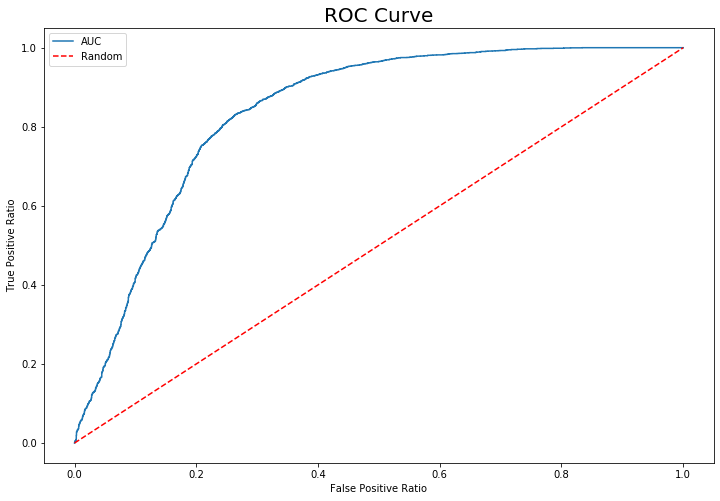

In [1171]:
# Draw ROC Curve
plt.subplots(figsize=(12,8))
plt.plot(fpr,tpr,label='AUC')
plt.plot([0,1],[0,1],linestyle='--',color='r',label='Random')
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve',fontsize=20)
plt.legend()

##### Seems like auc score is doing pretty well since it is getting closed to the upper left corner 

#### Without Processing and Balancing

In [1099]:
to_dummy_list = ['country','productgroup','category','style','gender','sizes']

In [1098]:
def todummy(data,dummylist):
    for i in to_dummy_list:
        dummies = pd.get_dummies(data[i],prefix= i ,dummy_na=False)
        data = data.drop(i,1)
        data = pd.concat([data,dummies],axis=1)
    return data

In [1100]:
X = todummy(df_new,to_dummy_list)
X = X.drop('label',axis=1)

In [1101]:
y=df_new['label']

In [1103]:
y.value_counts()

0    86072
1    13928
Name: label, dtype: int64

In [1104]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [1111]:
log_mod = LogisticRegression()

In [1112]:
log_mod.fit(x_train,y_train)

C:\Users\muham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [1114]:
y_hat = log_mod.predict_proba(x_test)

In [1117]:
train_acc_lr = log_mod.score(x_train,y_train)
print('LR training Accuracy is' ,train_acc_lr)

LR training Accuracy is 0.8576375


In [1118]:
test_acc_lr = log_mod.score(x_test,y_test)
print('LR Test Accuracy is' ,test_acc_lr)

LR Test Accuracy is 0.85235


In [1119]:
auc_log = roc_auc_score(y_test,y_hat[:,1])
print('AUC Score From LR is' ,auc)

AUC Score From LR is 0.83234676330346


## XGBoost

In [1202]:
xgb_mod = XGBClassifier(n_estomators=7,alpha=0.1,max_depth=4)

In [1203]:
xgb_mod.fit(x_train,y_train)

C:\Users\muham\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:54:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "n_estomators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:54:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_estomators=7,
              n_jobs=6, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.100000001, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [1204]:
y_hat_xg = xgb_mod.predict(x_test)

In [1205]:
xg_test_acc = xgb_mod.score(x_test,y_test)

In [1206]:
xg_train_acc = xgb_mod.score(x_train,y_train)

In [1207]:
print('XGB Test Accuracy is' ,xg_test_acc)
print('XGB Train Accuracy is' ,xg_train_acc)

XGB Test Accuracy is 0.7919956927494616
XGB Train Accuracy is 0.8150242326332795


In [1208]:
auc_log_xg = roc_auc_score(y_test,y_hat_xg)
print('AUC Score From XGB is' ,auc_log_xg)

AUC Score From XGB is 0.7913470739364492


## RandomForest

In [1064]:
model_forest = RandomForestClassifier(n_estimators=10,criterion='gini')

In [1065]:
model_forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [1066]:
y_train_pred = model_forest.predict(x_train)
y_test_pred_forest = model_forest.predict(x_test)

In [1067]:
train_acc_forest = accuracy_score(y_train,y_train_pred)
test_acc_forest = accuracy_score(y_test,y_test_pred_forest )
print('RandomForest Training score is ', train_acc_forest)
print('RandomForest Test score is ', test_acc_forest)

RandomForest Training score is  0.9827679052234787
RandomForest Test score is  0.7225412778176598


##### We can see that this model is overfitted, so we need to change whther features or hyperparameters

In [1068]:
model_forest_f1 = f1_score(y_test,y_test_pred_forest,average='weighted')
print('F1 Score = ',model_forest_f1)

F1 Score =  0.7225200433815919


In [1070]:
auc_rf_score_test = roc_auc_score(y_test,y_test_pred_forest)
auc_rf_score_train = roc_auc_score(y_train,y_train_pred)

print('Test AUC Score From RandomForest is' ,auc_rf_score_test)
print('Train AUC Score From RandomForest is' ,auc_rf_score_train)

Test AUC Score From RandomForest is 0.7225970103217506
Train AUC Score From RandomForest is 0.9827648533046789


##### Even the F1 Score is pretty Low

### Grid Search

In [1046]:
grid = {'n_estimators': np.arange(1, 100), 'criterion':['gini','entropy']}
accuracies = cross_val_score(model_forest,x_train,y_train,cv=5)

model_forest = GridSearchCV(model_forest, grid, cv=5)
model_forest.fit(x_train, y_train)

print("Hyperparameters Used:", model_forest.best_params_)
print("Train Score:", np.mean(accuracies))
print("Test Score:", model_forest.score(x_test, y_test))

Hyperparameters Used: {'criterion': 'gini', 'n_estimators': 98}
Train Score: 0.7429548721898339
Test Score: 0.7494615936826992


In [818]:
cm_forest=confusion_matrix(y_test,y_test_pred_forest)

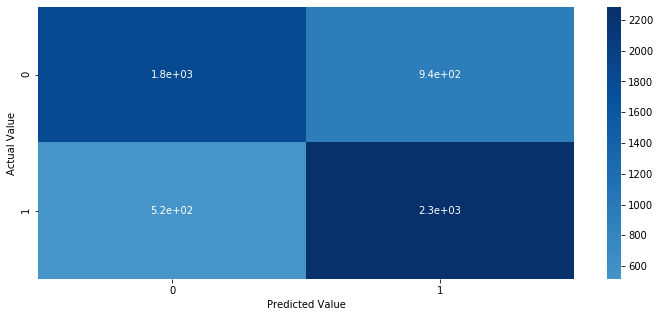

In [819]:
plt.figure(figsize=(12,5))
sns.heatmap(cm_forest,center=True,cmap='Blues',annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value');

### Feature Importance

In [1044]:
importances = model_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_forest.estimators_], axis=0)

Text(0, 0.5, 'Mean decrease in impurity')

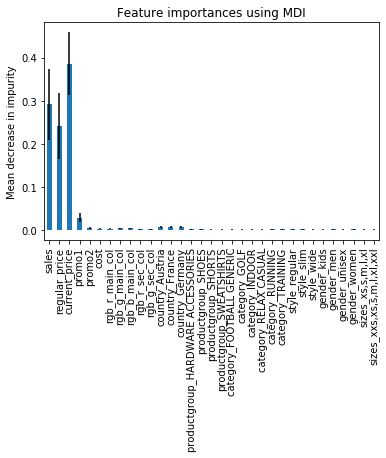

In [1045]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")



##### From this fearture selection technique we confirmed that sales, regualr&current price, promo1 & promo2, are best indicators as produced above from Logit statsmodel we have created 

##### After Grid Search we found that the achieved accuracy is 75%, with n_estimators 67

## Kneighbors

In [1179]:
kn_model = KNeighborsClassifier(n_neighbors=5)

In [1180]:
kn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [1181]:
y_pred_knn_test = kn_model.predict(x_test)
y_pred_knn_train = kn_model.predict(x_train)

In [1182]:
score_train_knn = kn_model.score(x_train,y_train)
score_test_knn = kn_model.score(x_test,y_test)
score_train_knn, score_test_knn

(0.818659127625202, 0.7390524048815507)

In [1186]:
knn_acc = accuracy_score(y_pred_knn,y_test)
print('The KNN model Accuracy is', knn_acc*100, "%")

The KNN model Accuracy is 73.81550610193827 %


In [1184]:
auc_knn_score_test = roc_auc_score(y_test,y_pred_knn_test)
auc_knn_score_train = roc_auc_score(y_train,y_pred_knn_train)
print('Test AUC Score From Kneighbors is' ,auc_knn_score_test)
print('Train AUC Score From Kneighbors is' ,auc_knn_score_train)

Test AUC Score From Kneighbors is 0.7387143659447296
Train AUC Score From Kneighbors is 0.8187388471699774


#### This model also is alittlebit overfitted with AUC score of 74%

### Feature Selection 

In [931]:
select = sklearn.feature_selection.SelectKBest(k=10)

In [932]:
selected_features = select.fit(x_train,y_train)
selected_indices = selected_features.get_support(indices=True)
selected_columns = [X.columns[i] for i in selected_indices]
selected_columns

['sales',
 'regular_price',
 'current_price',
 'promo1',
 'promo2',
 'cost',
 'rgb_r_main_col',
 'country_Austria',
 'productgroup_SHOES',
 'gender_kids']

#### Creating Models Pipeline to check the model accuracy before and after processing

In [952]:
# Splitting original data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [960]:
def evaluate_model(model_pipeline):
    # prediction
    train_pred = model_pipeline.predict(x_train)
    test_pred = model_pipeline.predict(x_test)
    
    train_pred = model_pipeline.predict(x_train)
    test_pred = model_pipeline.predict(x_test)
    
    # evaluations
    print('Training & Testing ROC AUC Scores:\n', '-'*40)
    print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_pred)))
    print('Testing roc auc score= {:.4f}'.format(roc_auc_score(y_test, test_pred)))
    print('')
    print('Training & Testing Confusion Metrices:')
    print('Training   confusion matrix:\n', confusion_matrix(y_train, train_pred))
    print('Testing confusion matrix:\n', confusion_matrix(y_test, test_pred))

In [971]:
model_rf = RandomForestClassifier()

In [962]:
rf_pipe = Pipeline(steps=[("classifier", model_rf)])

In [963]:
rf_pipe.fit(x_train,y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

In [964]:
evaluate_model(model_rf)

Training & Testing ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.9846
Testing roc auc score= 0.5612

Training & Testing Confusion Metrices:
Training   confusion matrix:
 [[68747   136]
 [  320 10797]]
Testing confusion matrix:
 [[16365   824]
 [ 2332   479]]


##### We can obviously see the difference of auc score before standrdization and balancing and after for RandomForest Model

>> Before: 56%

>> After: 75%

## SVM

In [1188]:
svc_model = SVC()

In [1189]:
svc_model.fit(x_train,y_train)

SVC()

In [1190]:
y_pred_svm_test = svc_model.predict(x_test)
y_pred_svm_train = svc_model.predict(x_train)

In [1131]:
score_train_svc = svc_model.score(x_train,y_train)
score_test_svc = svc_model.score(x_test,y_test)
score_train_svc, score_test_svc

(0.8610375, 0.85945)

In [1191]:
auc_svm_score_test = roc_auc_score(y_test,y_pred_svm_test)
auc_svm_score_train = roc_auc_score(y_train,y_pred_svm_train)
print('Test AUC Score From Kneighbors is' ,auc_svm_score_test)
print('Train AUC Score From Kneighbors is' ,auc_svm_score_train)

Test AUC Score From Kneighbors is 0.7784771278907323
Train AUC Score From Kneighbors is 0.7856028758681486


In [1198]:
cm_svm_processed =confusion_matrix(y_test,y_pred_svm_test)

In [1199]:
cm_svm_processed

array([[1850,  921],
       [ 310, 2491]], dtype=int64)

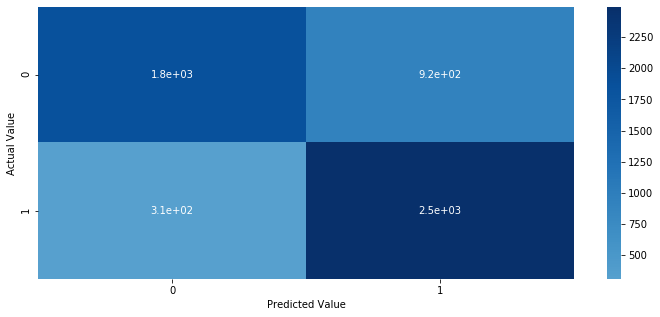

In [1200]:
plt.figure(figsize=(12,5))
sns.heatmap(cm_svm_processed,center=True,cmap='Blues',annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value');

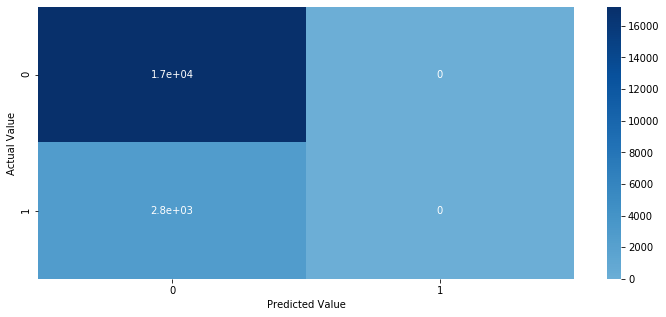

In [1135]:
plt.figure(figsize=(12,5))
sns.heatmap(cm_svm,center=True,cmap='Blues',annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value');

##### As we can see that due to the imbalanced label class, the model couldn't  be able to predict the minor binary feature(Buy), and gave as a misleading accuracy 

In [1213]:
acc_df = pd.DataFrame({'Model':['Logistic Regression','Random Forest','SVM','XGBoost','Knn'],
            'AUC Score':[auc_log, auc_rf_score_test, auc_svm_score_test,auc_log_xg,auc_knn_score_test]})

In [1214]:
accuracy_df = acc_df.sort_values('AUC Score',ascending=False)
accuracy_df

,Model,AUC Score
0,Logistic Regression,0.838582
3,XGBoost,0.791347
2,SVM,0.778477
4,Knn,0.738714
1,Random Forest,0.722597


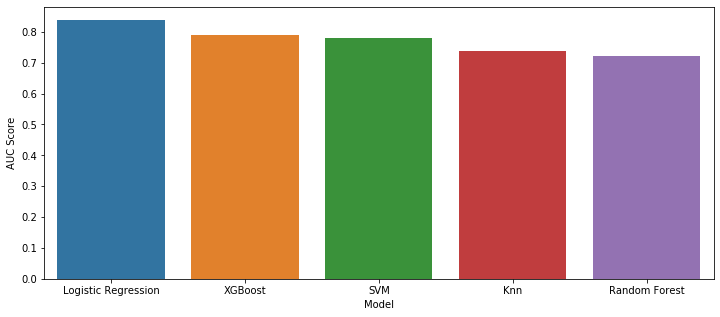

In [1216]:
plt.figure(figsize=(12,5))
sns.barplot(data=accuracy_df,x='Model',y='AUC Score');

### Selecting New Features Seeking better Performance

In [1217]:
df_final = df_new.copy()

In [1218]:
df_final

,country,sales,regular_price,current_price,promo1,promo2,productgroup,category,cost,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,label
0,Germany,28,5.95,3.95,0,0,SHOES,TRAINING,13.29,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,0
1,Germany,28,5.95,3.95,0,0,SHORTS,TRAINING,2.29,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,0
2,Germany,28,5.95,3.95,0,0,HARDWARE ACCESSORIES,GOLF,1.70,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,0
3,Germany,28,5.95,3.95,0,0,SHOES,RUNNING,9.00,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,0
4,Germany,28,5.95,3.95,0,0,SHOES,RELAX CASUAL,9.60,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,227,57.95,26.95,0,0,SWEATSHIRTS,TRAINING,4.20,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,0
99996,Germany,227,57.95,26.95,0,0,SHOES,FOOTBALL GENERIC,9.90,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,0
99997,Germany,227,57.95,26.95,0,0,SHOES,INDOOR,5.20,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,0
99998,Germany,227,57.95,26.95,0,0,HARDWARE ACCESSORIES,RUNNING,1.29,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,0


In [1219]:
to_dummy_list = ['country','productgroup','category','style','gender','sizes']

In [1220]:
def todummy(data,dummylist):
    for i in to_dummy_list:
        dummies = pd.get_dummies(data[i],prefix= i ,dummy_na=False)
        data = data.drop(i,1)
        data = pd.concat([data,dummies],axis=1)
    return data

In [1221]:
X = todummy(df_final,to_dummy_list)

In [1223]:
X = X.drop('label',axis=1)

In [1224]:
y = df_final['label']

In [1226]:
X = X[['sales','current_price','promo1','promo2','rgb_g_main_col']]

In [1227]:
X

,sales,current_price,promo1,promo2,rgb_g_main_col
0,28,3.95,0,0,104
1,28,3.95,0,0,238
2,28,3.95,0,0,173
3,28,3.95,0,0,140
4,28,3.95,0,0,43
...,...,...,...,...,...
99995,227,26.95,0,0,148
99996,227,26.95,0,0,26
99997,227,26.95,0,0,206
99998,227,26.95,0,0,181


In [1228]:
y.value_counts()

0    86072
1    13928
Name: label, dtype: int64

In [1236]:
balanced_class = RandomUnderSampler(sampling_strategy=0.75)
x_samp,y_samp = balanced_class.fit_resample(X,y)


In [1237]:
y_samp.value_counts()

0    18570
1    13928
Name: label, dtype: int64

In [1238]:
X=x_samp
y=y_samp

In [1239]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [1240]:
log_mod2 = LogisticRegression()

In [1244]:
log_mod2.fit(x_train,y_train)

LogisticRegression()

In [1254]:

y_pred_log_test = log_mod2.predict_proba(x_test)

In [1255]:
print("The Testing AUC score is  ",roc_auc_score(y_test,y_pred_log_test[:,1]))

The Testing AUC score is   0.6850017999343514


In [1256]:
log_mod2_acc = log_mod2.score(x_test,y_test)
print('LR2 Test Accuracy is' ,log_mod2_acc)

LR2 Test Accuracy is 0.6363076923076924


#### With the new features and balancing we got very low accuracy and AUC score

# Conclusion

>> First I created a revenue column from sales, price, and cost columns
>> Germany is the most dominant in sales and revenue followed by Austria
Shoes are the most dominant product in the dataset by 60000 record followed by hardware accessories by 20000
The most frequent year is 2015 followed by 2016

>> women with 70% frequency in the dataset, and the 30% left between men, kids, and unisex, additional regular style is the most requested style in the dataset by 50%, and 30% of wide style 

>> The regular price is less when the purchase happened than the regular price with no purchase incidence 

>> The promotion 1&2 average is higher when purchase happened than promotion with no purchase, which means that our customers are sensitive to promotions


>> The highest actual revenue was in 2015, and Germany produces the highest sales and revenue followed by Austria

>> Training, running, and football generic are the best sales and revenue in category, and shoes is the best product>> produces sales

>> article AA7884 is the second best article produces revenue but not sales and it's not falling under one category or product group

>> However France getting the highest promotion average through years, Germany has the highest sales and revenue among those countries.


>> Highest sales from customers originated in Austria

>> Highest Sold product Hardware Accessories, and Golf Category

>> France highest sold product are shorts, and for Austria are shoes 

>> France & Austria highest sold category is Training




## Recommendations

>> To target the right people with the most sold products and categories in their country

>> Germany for instance obviuosly are much interseted in Golf category, so will be a good move to target these group with the promotions to increase the number of sales and revenue as well
>> some articles like AA7884 produces relatively high revenue comparing to their sales number, which means we need to focus on the marketing for this kind of article to be seen more to the target group, consecuently increase the revenue from such move.
>> Focus on providing more promotion to Germany target group, as they provide the highest sales and revenue but they are lower average of promotion than France.

## Model

>> I have used several Supervided models after preprocessing and balancing the target class

>> Logistic Regression and XGBoost gave me the highes AUC score, I used this as my evaluation metric due to the high embalancing found in the target class

>> I have evaluated my models before and after balancing, it was very bad, the model even didi't recognize any positive incidence due to the high difference between the two binary classes (13%,87%)

>> The models maybe alittle bit underfitted in some models because I did RandomUnderSampling to the target feature and lost alot of data. 